# First basic NNs just for practice

### Creating NNs

In [1]:
import torch 
import torch.nn as nn 

In [2]:
first_net = nn.Sequential(
    nn.Linear(700, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [3]:
first_net

Sequential(
  (0): Linear(in_features=700, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)

In [4]:
first_net[0]

Linear(in_features=700, out_features=500, bias=True)

In [5]:
class customed_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(700, 500)
        self.linear2 = nn.Linear(500, 200)
        self.linear3 = nn.Linear(200, 10)
        self.activation = nn.ReLU()
    def forward(self, x):
        output = self.activation(self.linear1(x))
        output = self.activation(self.linear2(output))
        output = self.linear3(output)
        return output

In [6]:
second_net = customed_net()

In [7]:
second_net

customed_net(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=10, bias=True)
  (activation): ReLU()
)

### Training NNs

In [8]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_first = nn.Linear(1, 300)
        self.hidden_layer_last = nn.Linear(300, 1)
        self.activation = nn.ReLU()
    def forward(self, x):
        output = self.activation(self.hidden_layer_first(x))
        output = self.hidden_layer_last(output)
        return output 

In [9]:
net = net()

In [10]:
net

net(
  (hidden_layer_first): Linear(in_features=1, out_features=300, bias=True)
  (hidden_layer_last): Linear(in_features=300, out_features=1, bias=True)
  (activation): ReLU()
)

In [11]:
from torch import optim 

In [12]:
loss = nn.MSELoss()

In [13]:
import numpy as np

In [14]:
k = 5
X = torch.tensor(np.arange(-100,100), dtype = torch.float32).unsqueeze(1)
Y = X*X + 1000*torch.randn(200).unsqueeze(1)

In [15]:
X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

<AxesSubplot:>

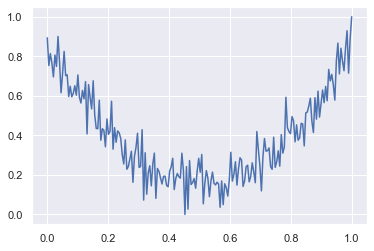

In [16]:
import seaborn as sns
sns.set()
sns.lineplot(x = X.squeeze(1), y = Y.squeeze(1))

In [17]:
from torch.utils.data import TensorDataset
data = TensorDataset(X, Y)

In [18]:
optimiser = optim.Adam(net.parameters(), lr=1e-4)
mse_loss = []
net.train()
for epoch in range(2000):
    y_pred = net(X)
    error = loss(Y, y_pred)
    error.backward()
    optimiser.step()
    optimiser.zero_grad()
    mse_loss.append(error)

<AxesSubplot:>

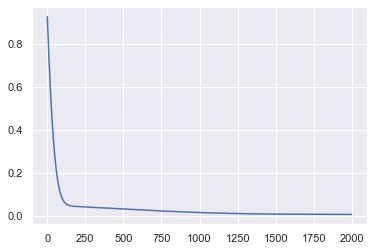

In [19]:
import seaborn as sns
sns.set()
sns.lineplot( x = np.arange(2000), y = torch.tensor(mse_loss).detach().numpy())

In [20]:
net.eval()
y_pred = net(X)

<AxesSubplot:>

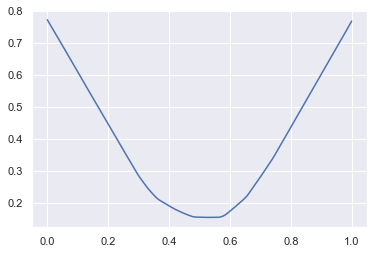

In [21]:
sns.lineplot(x = X.squeeze(1).detach(), y = y_pred.squeeze(1).detach())

In [22]:
class curve_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_first = nn.Linear(1, 300)
        self.hidden_layer_last = nn.Linear(300, 1)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        output = self.activation(self.hidden_layer_first(x))
        output = self.hidden_layer_last(output)
        return output 

In [23]:
net = curve_net()

In [28]:
optimiser = optim.Adam(net.parameters(), lr=1e-4)
mse_loss = []
net.train()
for epoch in range(1000):
    y_pred = net(X)
    error = loss(Y, y_pred)
    error.backward()
    optimiser.step()
    optimiser.zero_grad()
    mse_loss.append(error)

<AxesSubplot:>

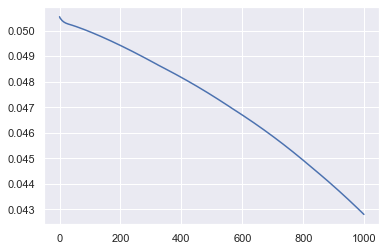

In [30]:
import seaborn as sns
sns.set()
sns.lineplot(x = np.arange(1000), y = torch.tensor(mse_loss).detach().numpy())

In [31]:
net.eval()
y_pred = net(X)

<AxesSubplot:>

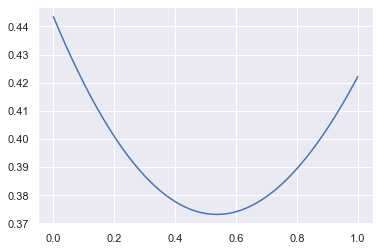

In [32]:
sns.lineplot(x = X.squeeze(1).detach(), y = y_pred.squeeze(1).detach())